In [3]:
#!pip install hypothesis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp
%matplotlib inline

In [4]:
hd = pd.read_csv(r'C:\Users\HP\Documents\New folder\data_heart\train.csv',encoding='utf-8')

In [5]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 15 columns):
id                 228 non-null int64
age                228 non-null int64
sex                228 non-null int64
chest_pain         228 non-null int64
resting_bp         228 non-null int64
cholestoral        228 non-null int64
high_sugar         228 non-null int64
ecg                228 non-null int64
max_rate           228 non-null int64
exercise_angina    228 non-null int64
st_depression      228 non-null float64
slope              228 non-null int64
vessels            224 non-null float64
thalium_scan       226 non-null float64
heart_disease      228 non-null int64
dtypes: float64(3), int64(12)
memory usage: 26.8 KB


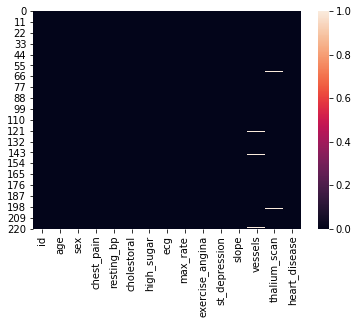

In [6]:
sns.heatmap(hd.isnull())

In [7]:
clms = hd.columns.values

In [8]:
cor = hd.corr()

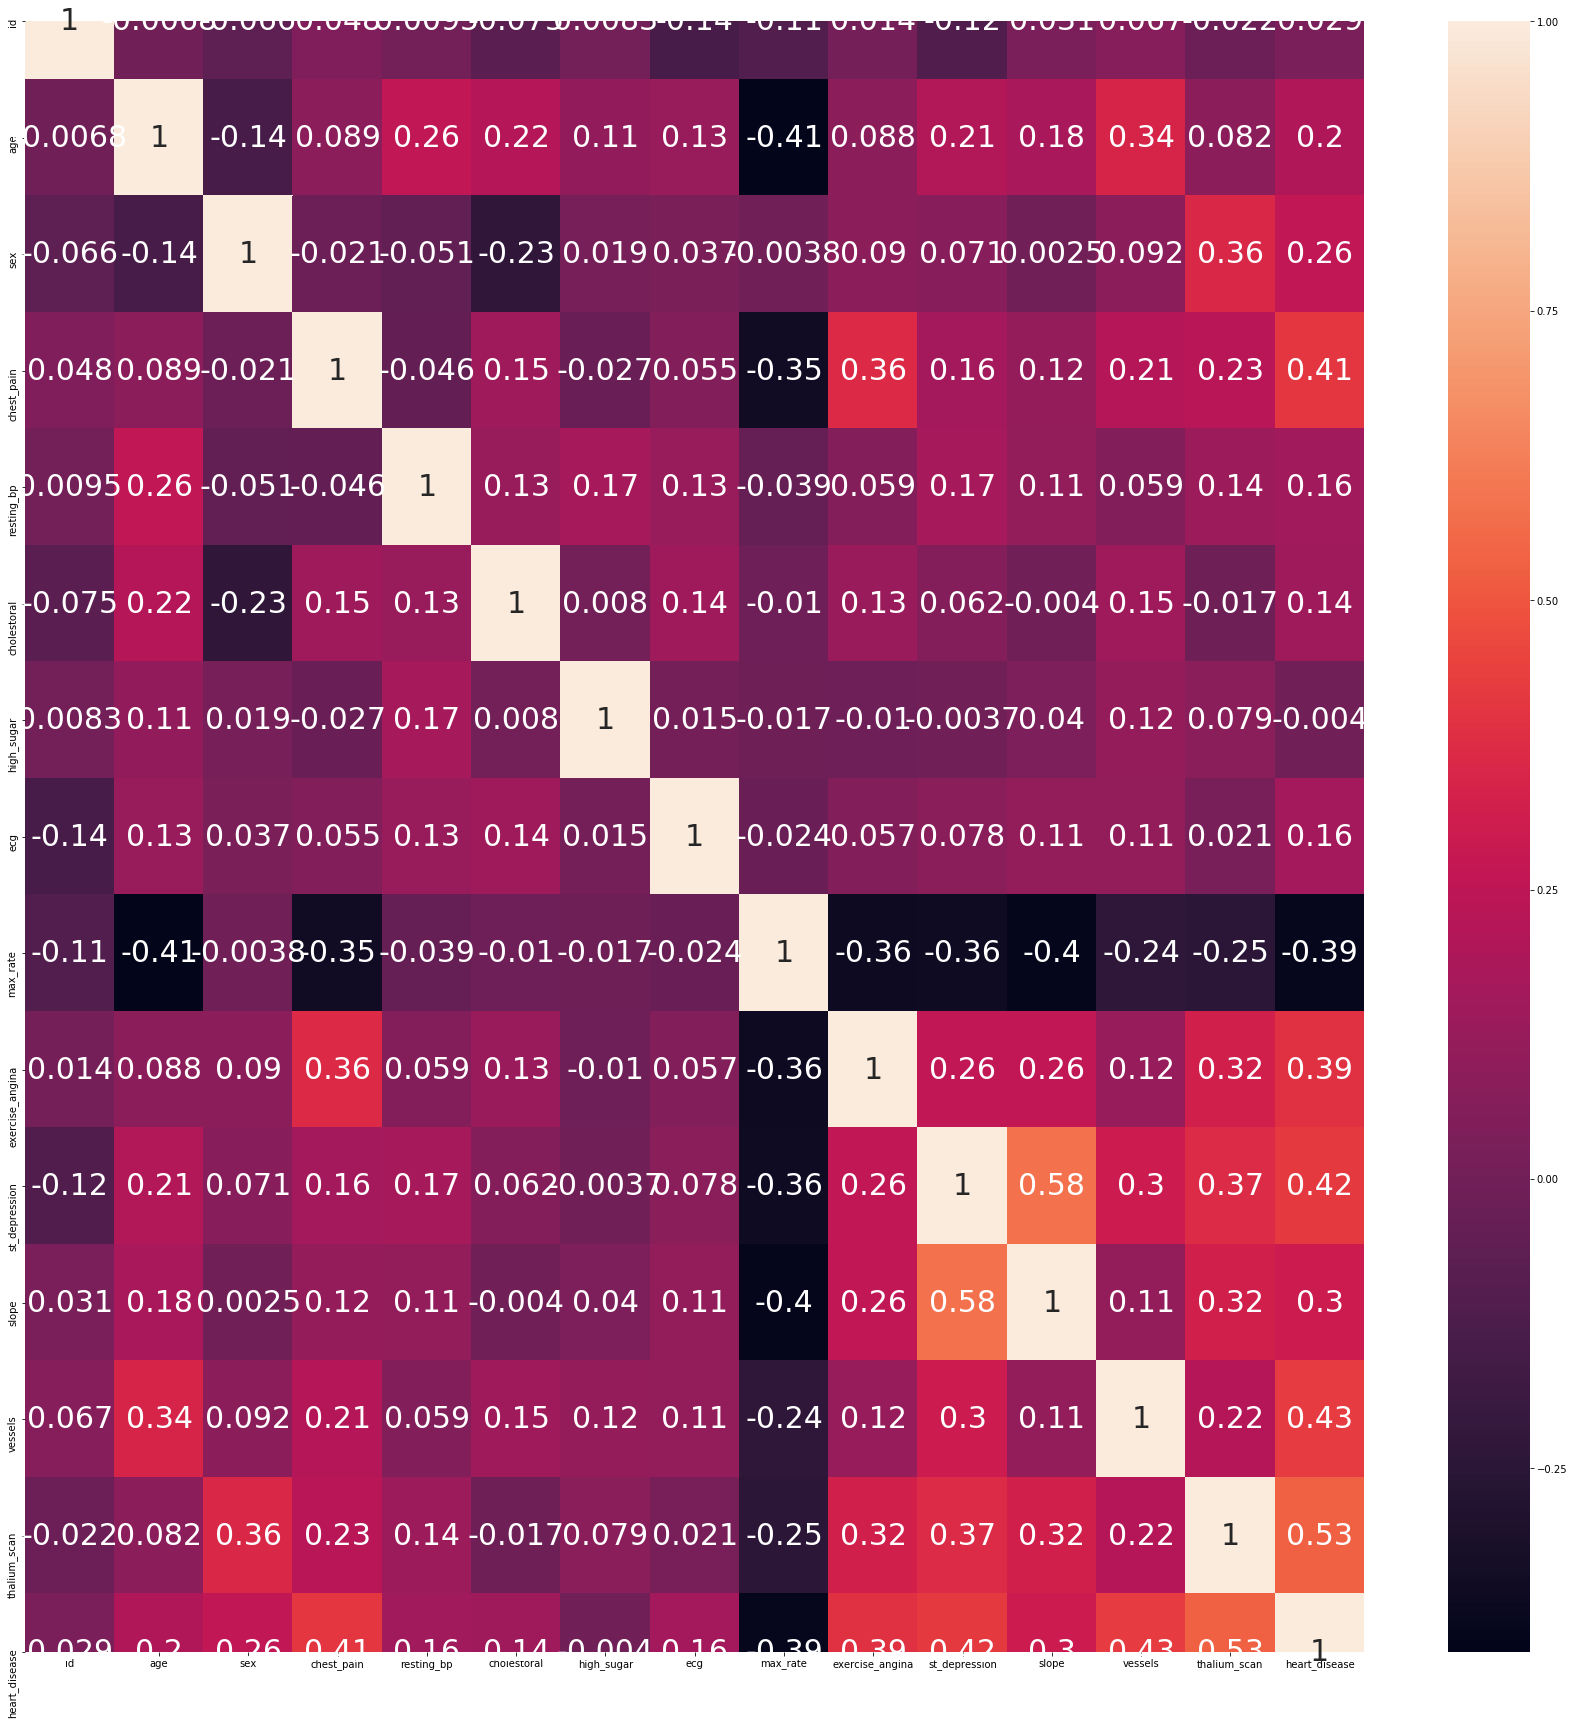

In [9]:
mp.figure(figsize=(30,30))
b, t = mp.ylim()
b+=1
t-=1
mp.ylim(b, t) # update the ylim(bottom, top) values

sns.heatmap(cor,annot=True , annot_kws={"size": 30})

In [10]:
hd.describe().T

,count,mean,std,min,25%,50%,75%,max
id,228.0,153.600877,85.501492,1.0,81.50,155.5,226.25,303.0
age,228.0,54.368421,9.003928,29.0,48.00,55.0,60.25,77.0
sex,228.0,0.697368,0.460408,0.0,0.00,1.0,1.00,1.0
chest_pain,228.0,3.157895,0.967115,1.0,3.00,3.0,4.00,4.0
resting_bp,228.0,131.982456,17.827852,94.0,120.00,130.0,140.00,192.0
cholestoral,228.0,248.337719,49.388909,126.0,212.75,244.0,276.25,417.0
high_sugar,228.0,0.140351,0.348115,0.0,0.00,0.0,0.00,1.0
ecg,228.0,1.026316,0.993020,0.0,0.00,2.0,2.00,2.0
max_rate,228.0,148.675439,23.969693,71.0,131.00,152.0,167.25,202.0
exercise_angina,228.0,0.324561,0.469241,0.0,0.00,0.0,1.00,1.0


In [11]:
.replace({"sex": {1: 'Male', 0:'Female'}}, inplace=True)   
df.replace({"target":{1:'Yes', 0:'No'}}, inplace=True)

SyntaxError: invalid syntax (<ipython-input-11-c1a33e13b7ab>, line 1)

['id' 'age' 'sex' 'chest_pain' 'resting_bp' 'cholestoral' 'high_sugar'
 'ecg' 'max_rate' 'exercise_angina' 'st_depression' 'slope' 'vessels'
 'thalium_scan' 'heart_disease']


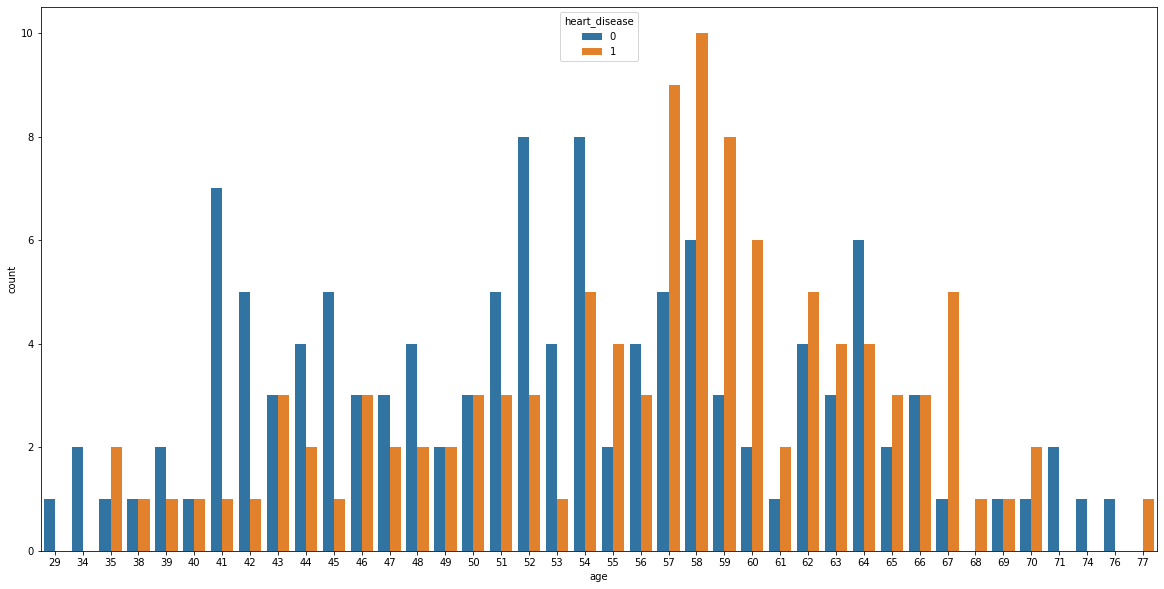

In [12]:
print(clms)
mp.figure(figsize=(20,10))
sns.countplot(x='age', hue='heart_disease',data=hd);

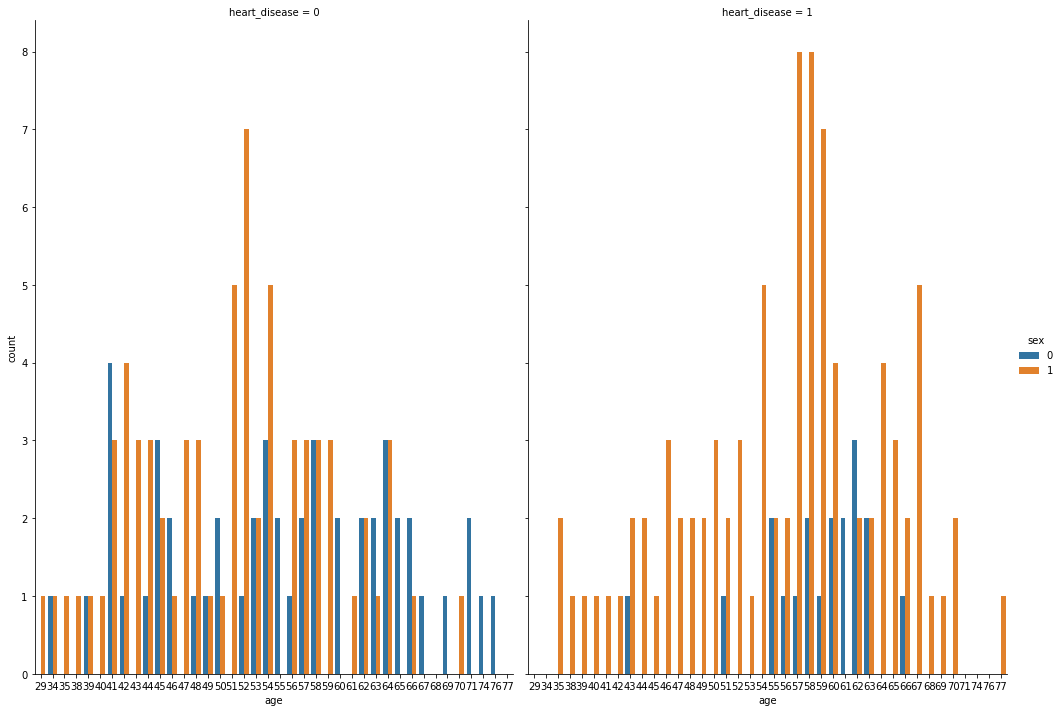

In [13]:

sns.catplot(x="age", hue="sex", col="heart_disease",kind='count',data=hd ,height=10, aspect=.7)

# Preprocessing 

In [14]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 15 columns):
id                 228 non-null int64
age                228 non-null int64
sex                228 non-null int64
chest_pain         228 non-null int64
resting_bp         228 non-null int64
cholestoral        228 non-null int64
high_sugar         228 non-null int64
ecg                228 non-null int64
max_rate           228 non-null int64
exercise_angina    228 non-null int64
st_depression      228 non-null float64
slope              228 non-null int64
vessels            224 non-null float64
thalium_scan       226 non-null float64
heart_disease      228 non-null int64
dtypes: float64(3), int64(12)
memory usage: 26.8 KB


In [15]:
corr_var=hd[['age', 'resting_bp', 'cholestoral','thalium_scan','slope']]
cv =corr_var.corr()
cv

,age,resting_bp,cholestoral,thalium_scan,slope
age,1.000000,0.258780,0.216043,0.082290,0.177245
resting_bp,0.258780,1.000000,0.129244,0.138995,0.112619
cholestoral,0.216043,0.129244,1.000000,-0.017135,-0.003975
thalium_scan,0.082290,0.138995,-0.017135,1.000000,0.319918
slope,0.177245,0.112619,-0.003975,0.319918,1.000000


In [16]:
Q1 = hd.quantile(0.25)
Q3 = hd.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                 144.75
age                 12.25
sex                  1.00
chest_pain           1.00
resting_bp          20.00
cholestoral         63.50
high_sugar           0.00
ecg                  2.00
max_rate            36.25
exercise_angina      1.00
st_depression        1.60
slope                1.00
vessels              1.00
thalium_scan         4.00
heart_disease        1.00
dtype: float64


In [17]:
print(hd < (Q1 - 1.5 * IQR)) |(hd > (Q3 + 1.5 * IQR))

        id    age    sex  chest_pain  resting_bp  cholestoral  high_sugar  \
0    False  False  False        True       False        False       False   
1    False  False  False       False       False        False       False   
2    False  False  False       False       False        False       False   
3    False  False  False       False       False        False       False   
4    False  False  False       False       False        False       False   
..     ...    ...    ...         ...         ...          ...         ...   
223  False  False  False       False       False        False       False   
224  False  False  False       False       False        False       False   
225  False  False  False       False       False        False       False   
226  False  False  False       False       False        False       False   
227  False  False  False       False       False        False       False   

       ecg  max_rate  exercise_angina  st_depression  slope  vessels  \
0  

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [18]:
out = hd[~((hd < (Q1 - 1.5 * IQR)) |(hd > (Q3 + 1.5 * IQR))).any(axis=1)]
out.shape

(159, 15)

In [19]:
hd.isnull().sum()

id                 0
age                0
sex                0
chest_pain         0
resting_bp         0
cholestoral        0
high_sugar         0
ecg                0
max_rate           0
exercise_angina    0
st_depression      0
slope              0
vessels            4
thalium_scan       2
heart_disease      0
dtype: int64

In [20]:
hd['vessels'].replace(0, np.nan, inplace= True)
hd['thalium_scan'].replace(0, np.nan, inplace= True)

In [21]:
median_value=hd['vessels'].median()
#print(median_value)
hd['vessels']=hd['vessels'].fillna(median_value)

In [22]:
median_value=hd['thalium_scan'].median()
#print(median_value)
hd['thalium_scan']=hd['thalium_scan'].fillna(median_value)

In [23]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 15 columns):
id                 228 non-null int64
age                228 non-null int64
sex                228 non-null int64
chest_pain         228 non-null int64
resting_bp         228 non-null int64
cholestoral        228 non-null int64
high_sugar         228 non-null int64
ecg                228 non-null int64
max_rate           228 non-null int64
exercise_angina    228 non-null int64
st_depression      228 non-null float64
slope              228 non-null int64
vessels            228 non-null float64
thalium_scan       228 non-null float64
heart_disease      228 non-null int64
dtypes: float64(3), int64(12)
memory usage: 26.8 KB


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [25]:
X_train, X_test, y_train, y_test = train_test_split(hd.drop(['heart_disease'],axis=1),hd['heart_disease'] , test_size=0.33, random_state=42)

In [26]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [27]:
test = pd.read_csv(r'C:\Users\HP\Documents\New folder\data_heart\test.csv',encoding='utf-8')

In [30]:
heart_disaese = decision_tree.predict(test)
heart_disaese

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [36]:
my_submission = pd.DataFrame({'Id': test.id, 'heart_disease': heart_disaese})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)


In [34]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 15 columns):
id                 228 non-null int64
age                228 non-null int64
sex                228 non-null int64
chest_pain         228 non-null int64
resting_bp         228 non-null int64
cholestoral        228 non-null int64
high_sugar         228 non-null int64
ecg                228 non-null int64
max_rate           228 non-null int64
exercise_angina    228 non-null int64
st_depression      228 non-null float64
slope              228 non-null int64
vessels            228 non-null float64
thalium_scan       228 non-null float64
heart_disease      228 non-null int64
dtypes: float64(3), int64(12)
memory usage: 26.8 KB
